# Q-2-1 Binary Logistic Regression

Janet Matsen

Code notes:


In [1]:
import numpy as np
import matplotlib as mpl
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

from mnist import MNIST  # public package for making arrays out of MINST data.

In [2]:
import sys
sys.path.append('../code/')

In [3]:
from logistic_regression import LogisticRegression, LogisticRegressionBinary
from hyperparameter_explorer import HyperparameterExplorer

In [4]:
from mnist_helpers import mnist_training, mnist_testing, mnist_training_binary, mnist_testing_binary

In [5]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

### Prepare MNIST training data

In [6]:
train_X, train_y = mnist_training_binary(2, shuffled=True)
test_X, test_y = mnist_testing_binary(2)

[    0     1     2 ..., 59997 59998 59999]
[    0     1     2 ..., 59997 59998 59999]
[   0    1    2 ..., 9997 9998 9999]


In [7]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [8]:
print(np.var(train_y))
print(np.var(test_y))

0.08943951
0.09254976


## Explore hyperparameters before training model on all of the training data.

In [9]:
hyper_explorer = HyperparameterExplorer(X=train_X, y=train_y, 
                                        model=LogisticRegressionBinary, 
                                        validation_split=0.1, 
                                        score_name = '-(log loss)/N, training', 
                                        use_prev_best_weights=True,
                                        test_X=test_X, test_y=test_y)  # need test_X, test_y for loss w/ fit plot

6000 of 60000 points from training are reserved for validation
variances of all training data: 0.08943950999999999
variances of split-off training & validation data: 0.08924355246913578, 0.09119774999999997


.....0.228878939774
.....0.146840970623
.....0.125649138876
.....0.116492642243
.....0.110910637592
.....0.107000618198
.....0.104042612147
.....0.101692908967
.....0.099762720292
.....0.09813797404
.....0.0967447832983
.....0.0955326879921
.....0.0944657625179
.....0.0935175571451
.....0.0926680547512
.....0.0919017538654
.....0.0912064138766
.....0.0905722064818
.....0.0899911255772
.....0.0894565667915
max iterations (100) reached.


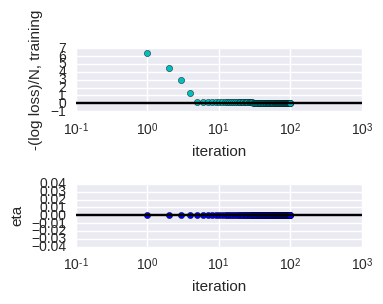

In [10]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

In [11]:
hyper_explorer.models

{1: <logistic_regression.LogisticRegressionBinary at 0x7fd8bab78c50>}

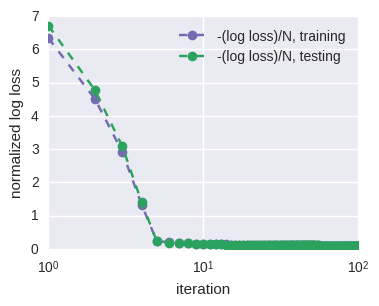

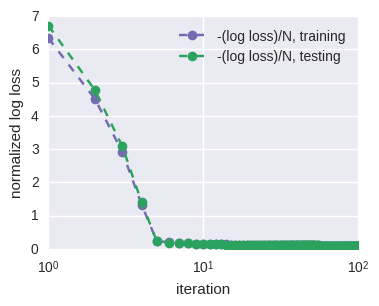

In [12]:
hyper_explorer.models[1].plot_test_and_train_log_loss_during_fitting()

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.09458159254219557
.....0.0871346583877
.....0.0859488674225
.....0.0851317191929
.....0.0845082296359
.....0.0840058396195
.....0.0835867357178
.....0.0832285068557
.....0.0829167091236
.....0.0826414640379
.....0.0823957086457
.....0.0821742154485
.....0.0819730067097
.....0.0817889860499
.....0.0816196968851
.....0.0814631584872
.....0.081317751447
.....0.0811821356434
.....0.081055190219
.....0.0809359688263
.....0.0808236657044
max iterations (100) reached.


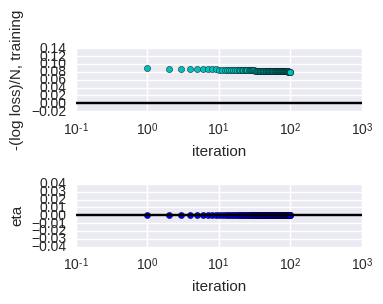

In [13]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.0857362025578528
.....0.0802859175926
.....0.0799862332641
.....0.0797667631811
.....0.079590632267
.....0.0794422895999
.....0.0793135096726
.....0.0791993493192
.....0.0790965800223
.....0.0790029650092
.....0.0789168846443
.....0.0788371251493
.....0.0787627514865
.....0.0786930268733
.....0.0786273596651
.....0.0785652670753
.....0.0785063496674
.....0.0784502729711
.....0.0783967539455
.....0.0783455508228
.....0.0782964553623
max iterations (100) reached.


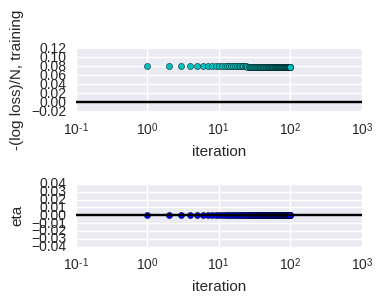

In [14]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.08350384104444057
.....0.0780497008123
.....0.0779020845723
.....0.0777890802171
.....0.0776952715233
.....0.0776140504525
.....0.077541870851
.....0.0774765729361
.....0.0774167282205
.....0.077361335118
.....0.0773096600568
.....0.0772611472389
.....0.0772153639771
.....0.077171965857
.....0.0771306735957
.....0.0770912571368
.....0.0770535243984
.....0.077017313114
.....0.0769824847896
.....0.0769489201423
.....0.076916515602
max iterations (100) reached.


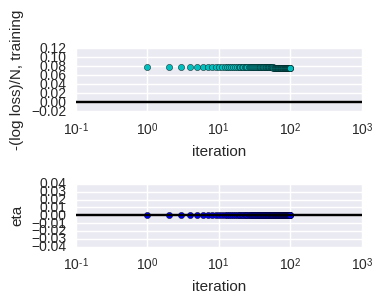

In [15]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.08240930245078756
.....0.0767506561293
.....0.0766488737147
.....0.0765697448516
.....0.0765032920869
.....0.0764452145281
.....0.0763931927883
.....0.0763458079181
.....0.0763021175137
.....0.0762614582246
.....0.0762233424108
.....0.0761873993102
.....0.07615333932
.....0.0761209311815
.....0.0760899867943
.....0.0760603507563
.....0.0760318929497
.....0.0760045031541
.....0.0759780870491
.....0.0759525631916
.....0.075927860693
max iterations (100) reached.


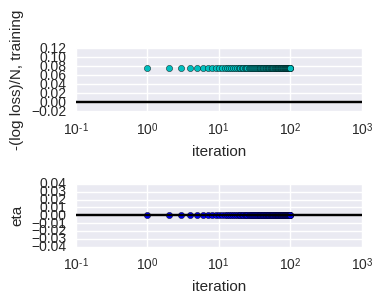

In [16]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.08167289490921754
.....0.075800580633
.....0.0757217242953
.....0.0756600506271
.....0.0756080169475
.....0.0755623668911
.....0.0755213419968
.....0.0754838651442
.....0.0754492201258
.....0.0754169022527
.....0.0753865401291
.....0.0753578510902
.....0.075330614131
.....0.0753046526049
.....0.075279822701
.....0.0752560055029
.....0.0752331013567
.....0.0752110257775
.....0.0751897064089
.....0.075169080724
.....0.0751490942567
max iterations (100) reached.


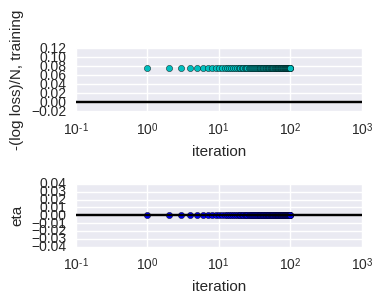

In [17]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.08112243724716188
.....0.0750457675006
.....0.0749814322987
.....0.0749309535911
.....0.0748882569367
.....0.0748507183464
.....0.0748169201347
.....0.0747859935138
.....0.0747573605469
.....0.0747306138074
.....0.0747054533514
.....0.0746816508041
.....0.0746590275392
.....0.0746374407288
.....0.0746167740517
.....0.0745969312876
.....0.0745778317742
.....0.0745594071032
.....0.0745415986674
.....0.0745243558039
.....0.0745076343671
.....0.0744913956143
.....0.0744756053252
.....0.0744602330972
.....0.0744452517762
.....0.0744306369915
.....0.0744163667733
.....0.0744024212351
.....0.0743887823077
.....0.0743754335159
.....0.0743623597886
.....0.0743495472978
.....0.0743369833196
.....0.0743246561155
.....0.0743125548288
.....0.0743006693948
.....0.0742889904631
.....0.0742775093283
.....0.0742662178697
.....0.0742551084984
.....0.0742441741093
max iterations (200) reached.


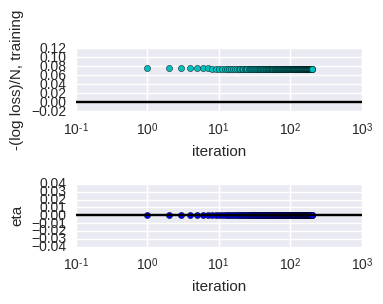

In [18]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=2*10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.08052110543278589
.....0.0741637436545
.....0.0741134373717
.....0.0740738518527
.....0.0740402917022
.....0.0740107278717
.....0.0739840637449
.....0.0739596270842
.....0.0739369705707
.....0.0739157787694
.....0.0738958193958
.....0.0738769155427
.....0.0738589288033
.....0.0738417484803
.....0.0738252843968
.....0.0738094619408
.....0.0737942185485
.....0.073779501148
.....0.0737652642598
.....0.0737514685606
.....0.0737380797769
.....0.0737250678234
.....0.0737124061202
.....0.0737000710476
.....0.0736880415047
.....0.0736762985496
.....0.0736648251024
.....0.0736536056995
.....0.0736426262875
.....0.07363187405
.....0.0736213372604
.....0.0736110051569
.....0.073600867835
.....0.0735909161554
.....0.0735811416636
.....0.0735715365204
.....0.0735620934411
.....0.0735528056425
.....0.0735436667956
.....0.0735346709847
.....0.0735258126702
max iterations (200) reached.


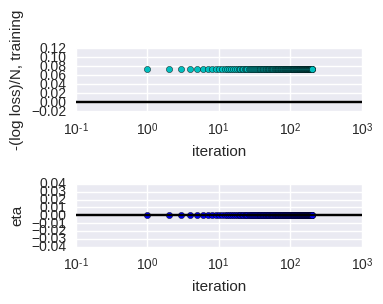

In [19]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=2*10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.08007759502311682
.....0.0734605403699
.....0.0734195958085
.....0.0733873153192
.....0.0733599061765
.....0.073335729083
.....0.0733138979151
.....0.0732938693836
.....0.0732752819192
.....0.0732578805181
.....0.0732414773697
.....0.0732259294186
.....0.0732111247269
.....0.0731969737553
.....0.0731834035531
.....0.0731703537528
.....0.073157773729
.....0.0731456205309
.....0.073133857348
.....0.0731224523481
.....0.0731113777836
.....0.0731006092946
.....0.0730901253569
.....0.0730799068408
.....0.073069936655
.....0.0730601994548
.....0.0730506814022
.....0.0730413699676
.....0.0730322537622
.....0.0730233223988
.....0.0730145663721
.....0.0730059769581
.....0.0729975461267
.....0.0729892664673
.....0.0729811311237
.....0.0729731337383
.....0.0729652684023
.....0.072957529613
.....0.0729499122359
.....0.0729424114709
.....0.0729350228228
max iterations (200) reached.


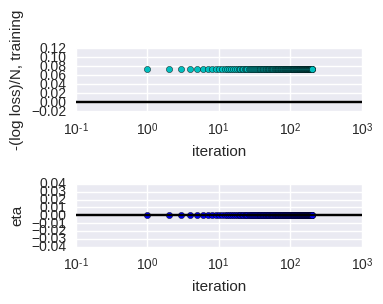

In [20]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=2*10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.07973803269346255
.....0.0728805124401
.....0.072846245466
.....0.0728191917547
.....0.0727961946701
.....0.0727758896773
.....0.0727575390979
.....0.0727406906112
.....0.0727250431616
.....0.0727103844046
.....0.0726965579347
.....0.0726834446075
.....0.0726709511873
.....0.0726590030884
.....0.0726475395384
.....0.0726365102435
.....0.0726258730226
.....0.0726155920868
.....0.0726056367607
.....0.0725959805156
.....0.0725866002252
max iterations (100) reached.


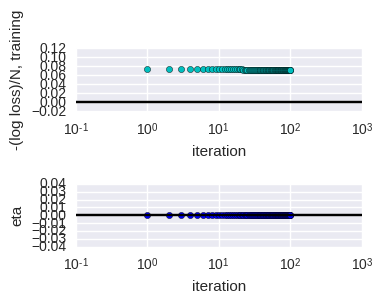

In [21]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.07954922266861769
.....0.0725377741995
.....0.0725070501913
.....0.0724827750958
.....0.0724621272096
.....0.0724438867043
.....0.0724273940969
.....0.0724122449942
.....0.0723981702282
.....0.0723849799373
.....0.0723725342704
.....0.0723607266893
.....0.0723494738195
.....0.0723387089616
.....0.0723283777666
.....0.0723184352548
.....0.0723088437007
.....0.0722995710943
.....0.0722905899983
.....0.0722818766833
.....0.0722734104629
.....0.0722651731734
.....0.0722571487643
.....0.0722493229689
.....0.0722416830392
.....0.0722342175286
.....0.0722269161136
.....0.0722197694453
.....0.0722127690257
.....0.0722059071026
.....0.0721991765817
.....0.072192570951
.....0.0721860842157
.....0.072179710843
.....0.0721734457136
.....0.0721672840795
.....0.072161221528
.....0.0721552539488
.....0.0721493775064
.....0.0721435886148
.....0.0721378839153
max iterations (200) reached.


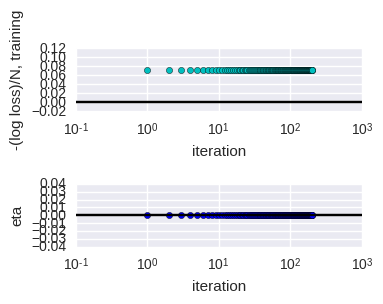

In [22]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=2*10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.07931918542830481
.....0.0720957361029
.....0.0720691714288
.....0.0720481632312
.....0.0720302807102
.....0.0720144729549
.....0.0720001717722
.....0.0719870287295
.....0.0719748118949
.....0.0719633576641
.....0.0719525455215
.....0.0719422836541
.....0.0719325002081
.....0.071923137698
.....0.0719141492806
.....0.0719054961862
.....0.0718971458966
.....0.0718890708189
.....0.0718812473009
.....0.0718736548861
.....0.07186627574
.....0.0718590942032
.....0.0718520964368
.....0.0718452701399
.....0.0718386043203
.....0.0718320891077
.....0.0718257155999
.....0.0718194757348
.....0.0718133621836
.....0.0718073682606
.....0.0718014878472
.....0.0717957153268
.....0.0717900455287
.....0.0717844736804
.....0.071778995366
.....0.0717736064897
.....0.0717683032448
.....0.0717630820854
.....0.0717579397023
.....0.0717528730017
.....0.0717478790857
max iterations (200) reached.


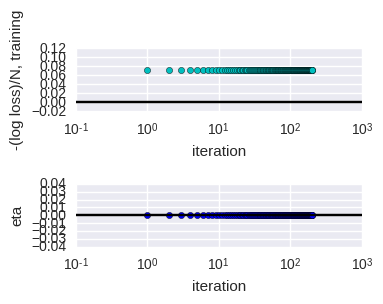

In [23]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=2*10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.0791316595100899
.....0.071710959823
.....0.0716876631944
.....0.0716692256423
.....0.0716535217357
.....0.0716396325362
.....0.0716270611826
.....0.0716155029732
.....0.071604755078
.....0.0715946744158
.....0.0715851555853
.....0.0715761182855
.....0.0715674996701
.....0.0715592494579
.....0.0715513266751
.....0.0715436974089
.....0.0715363332137
.....0.0715292099516
.....0.0715223069315
.....0.0715156062573
.....0.0715090923261
.....0.0715027514377
.....0.0714965714843
.....0.0714905417031
.....0.0714846524763
.....0.0714788951675
.....0.0714732619869
.....0.07146774588
.....0.0714623404332
.....0.0714570397962
.....0.0714518386143
.....0.071446731972
.....0.0714417153442
.....0.0714367845539
.....0.0714319357361
.....0.0714271653061
.....0.0714224699318
.....0.0714178465096
.....0.0714132921428
.....0.0714088041231
.....0.0714043799139
max iterations (200) reached.


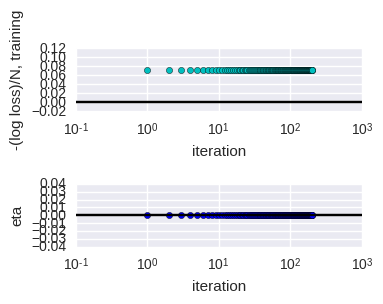

In [24]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=2*10**2, delta_percent=eta0*10, verbose=True)

Run for much longer...

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.07897629896368533
.................................................................................................................................................................................................................................................Loss optimized.  Old/N: 0.0710686606963591, new/N:0.07106795124652061. Eta: 1.1904154565430094e-10


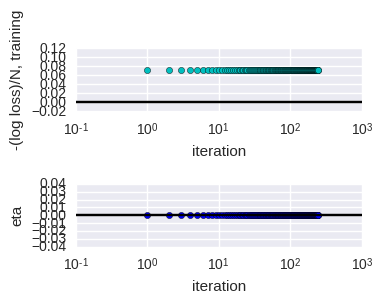

In [25]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.07883319337753292
....................................................................................................max iterations (100) reached.


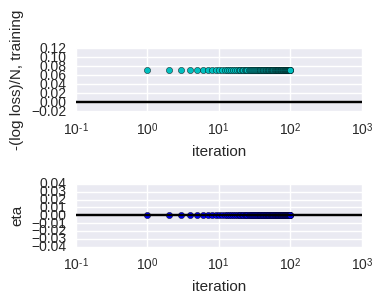

In [26]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.0787570116830791
....................................................................................................max iterations (100) reached.


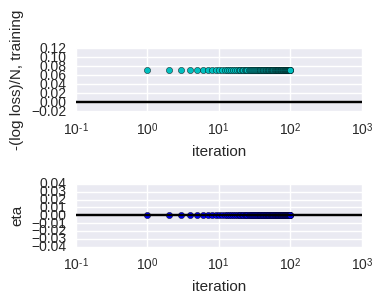

In [27]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.078688465140148
..............................................................................................................................................................Loss optimized.  Old/N: 0.07049375138062645, new/N:0.07049304823466014. Eta: 1.468614047626193e-10


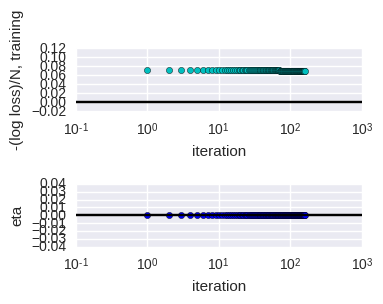

In [28]:
eta0=1e-4
hyper_explorer.train_model(lam=0, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 0.  Corresponded to -(log loss)/N, validation = 0.0786097617585476
..........................................................................................................................Loss optimized.  Old/N: 0.07016605969425808, new/N:0.07016465721475812. Eta: 3.3395171654349344e-10


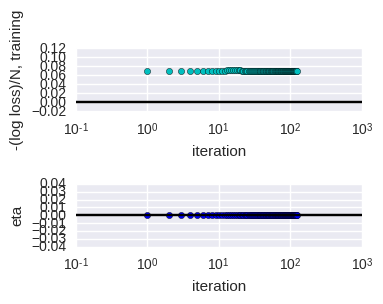

In [30]:
eta0=2*1e-4
hyper_explorer.train_model(lam=10, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 10.  Corresponded to -(log loss)/N, validation = 0.07849489116688248
...................................................................................................Loss optimized.  Old/N: 0.069906434919012, new/N:0.06990503760151823. Eta: 3.703703703703704e-10


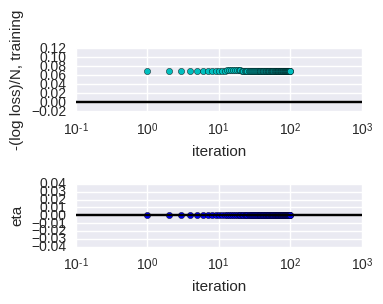

In [31]:
eta0=2*1e-4
hyper_explorer.train_model(lam=10, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 10.  Corresponded to -(log loss)/N, validation = 0.07841134188698191
...................................................................................Loss optimized.  Old/N: 0.06969364433747575, new/N:0.0696922517548431. Eta: 4.0410720414072666e-10


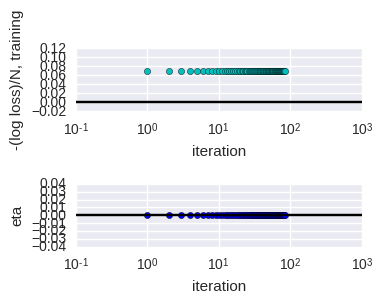

In [32]:
eta0=2*1e-4
hyper_explorer.train_model(lam=10, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 10.  Corresponded to -(log loss)/N, validation = 0.078346259057721
........Loss optimized.  Old/N: 0.06965205440709724, new/N:0.06965323033629169. Eta: 1.234567901234568e-09


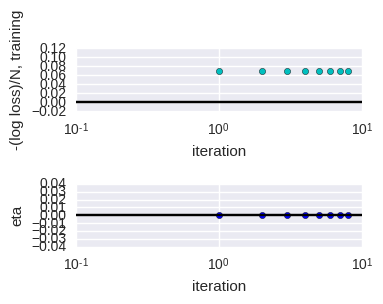

In [34]:
eta0=2*1e-4
hyper_explorer.train_model(lam=10, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 10.  Corresponded to -(log loss)/N, validation = 0.0782363106447062
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Loss optimized.  Old/N: 0.069357999427404, new/N:0.06935661318712855. Eta: 1.590876961435399e-10


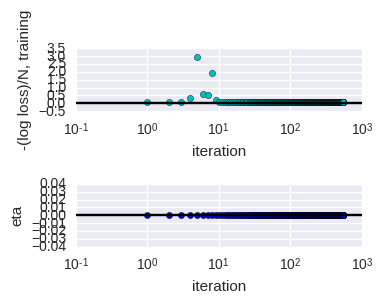

In [35]:
eta0=2*1e-4
hyper_explorer.train_model(lam=1e2, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100.0.  Corresponded to -(log loss)/N, validation = 0.07885582344325766
..........Loss optimized.  Old/N: 0.06925203057280886, new/N:0.06925218069614712. Eta: 1.1167086836213468e-09


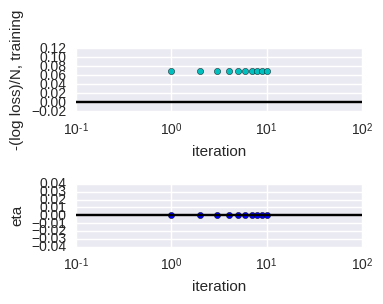

In [36]:
eta0=2*1e-4
hyper_explorer.train_model(lam=1e2, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100.0.  Corresponded to -(log loss)/N, validation = 0.07858404189294003
.................................................................................................................................Loss optimized.  Old/N: 0.06903532135408444, new/N:0.06903463313717496. Eta: 1.6241815172352394e-10


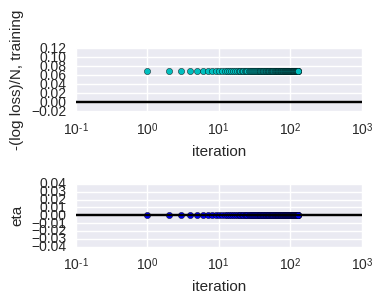

In [38]:
eta0=2*1e-4
hyper_explorer.train_model(lam=1e2, eta0=eta0, max_iter=10**3, delta_percent=eta0*10, verbose=False)

In [ ]:
hyper_explorerr_explorer.plot

returning best weights for lambda = 100.0.  Corresponded to -(log loss)/N, validation = 0.07858404189294003
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................max iterations (500) reached.


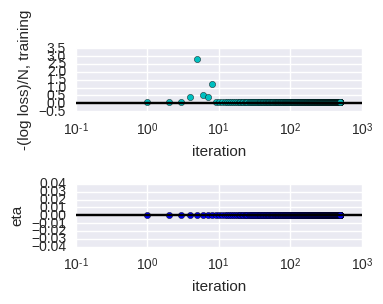

In [39]:
eta0=2*1e-4
hyper_explorer.train_model(lam=100, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100.0.  Corresponded to -(log loss)/N, validation = 0.07858404189294003
.................................................................................................................................Loss optimized.  Old/N: 0.06903532135399286, new/N:0.06903463313708263. Eta: 1.6241815172352394e-10


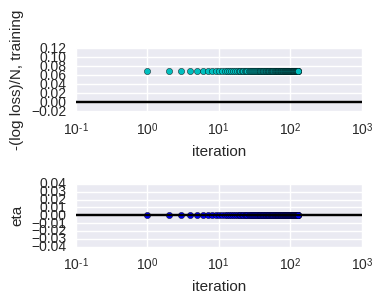

In [40]:
eta0=1*1e-4
hyper_explorer.train_model(lam=100, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100.0.  Corresponded to -(log loss)/N, validation = 0.07854219831489401
.................................................................................Loss optimized.  Old/N: 0.06892624365596425, new/N:0.06892555785894784. Eta: 2.0450282606453064e-10


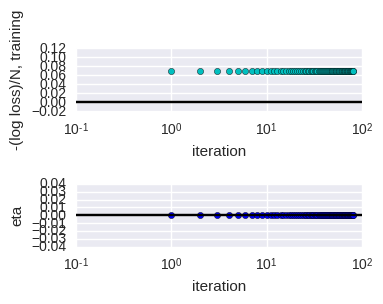

In [41]:
eta0=1*1e-4
hyper_explorer.train_model(lam=100, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100.0.  Corresponded to -(log loss)/N, validation = 0.07845087757591102
.............................................................Loss optimized.  Old/N: 0.06884923859703629, new/N:0.0688485539799639. Eta: 2.351854203707232e-10


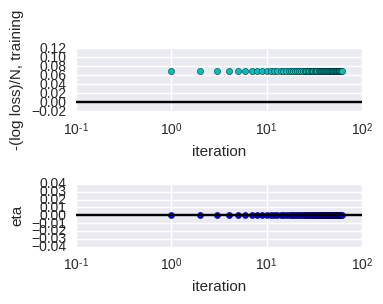

In [42]:
eta0=1*1e-4
hyper_explorer.train_model(lam=100, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


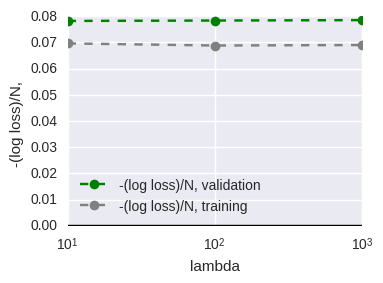

In [43]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 1000.0.  Corresponded to -(log loss)/N, validation = 0.07854219831456688
.................................................................................Loss optimized.  Old/N: 0.06892624365621222, new/N:0.06892555785919703. Eta: 2.0450282606453064e-10


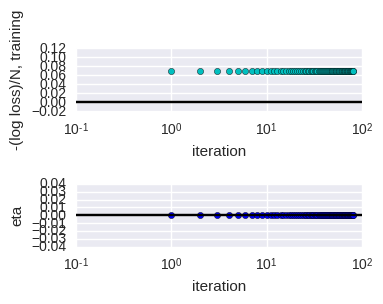

In [44]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e3, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 1000.0.  Corresponded to -(log loss)/N, validation = 0.07845087757546047
.............................................................Loss optimized.  Old/N: 0.06884923859743809, new/N:0.06884855398036721. Eta: 2.351854203707232e-10


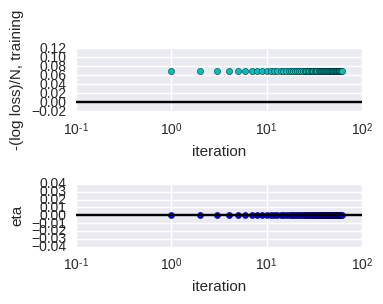

In [45]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e3, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 1000.0.  Corresponded to -(log loss)/N, validation = 0.07839367688008966
..................................................Loss optimized.  Old/N: 0.06878822090813054, new/N:0.06878753420884505. Eta: 2.5931112667185367e-10


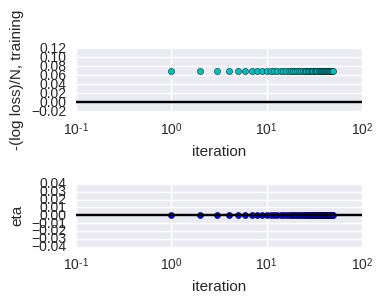

In [46]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e3, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 1000.0.  Corresponded to -(log loss)/N, validation = 0.0783529752598479
............................................Loss optimized.  Old/N: 0.068736029005488, new/N:0.06873534657962829. Eta: 2.7605777499997404e-10


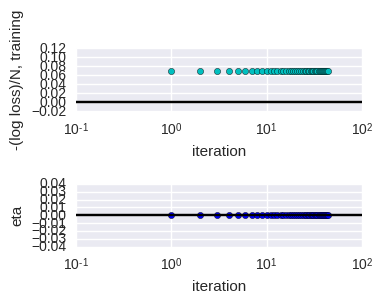

In [47]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e4, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 10000.0.  Corresponded to -(log loss)/N, validation = 0.07832134630775965
........................................Loss optimized.  Old/N: 0.0686896016090476, new/N:0.06868892349610707. Eta: 2.8921067016408535e-10


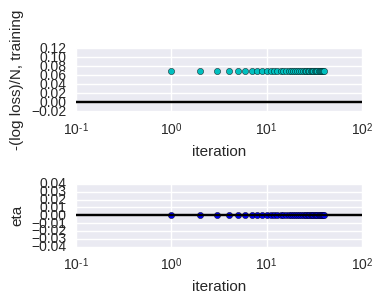

In [48]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e4, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 10000.0.  Corresponded to -(log loss)/N, validation = 0.07829552066587024
....................................Loss optimized.  Old/N: 0.06864802397047269, new/N:0.06864733931487374. Eta: 3.0444256908399504e-10


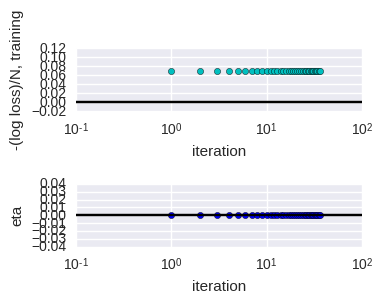

In [49]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e4, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


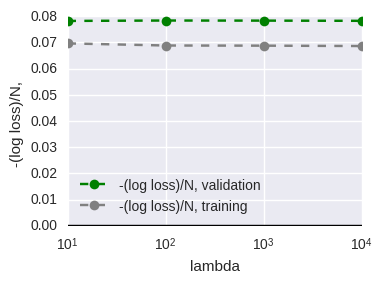

In [50]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 10000.0.  Corresponded to -(log loss)/N, validation = 0.0782740807983206
..................................Loss optimized.  Old/N: 0.0686093454114367, new/N:0.06860866558380993. Eta: 3.1302009434389505e-10


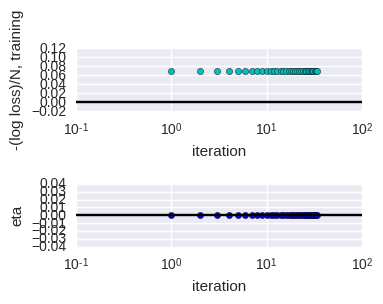

In [51]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e5, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100000.0.  Corresponded to -(log loss)/N, validation = 0.07825544770448727
................................Loss optimized.  Old/N: 0.06857324535630785, new/N:0.06857256574072808. Eta: 3.223660295475886e-10


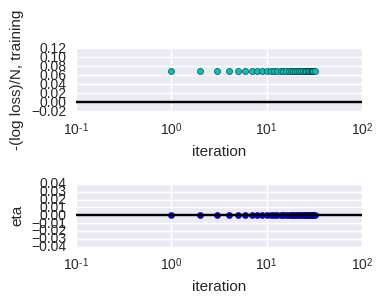

In [52]:
eta0=1*1e-4
hyper_explorer.train_model(lam=1e5, eta0=eta0, max_iter=5*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 100000.0.  Corresponded to -(log loss)/N, validation = 0.07823908549480486
.....0.0685623077617
.....0.0685558085734
.....0.0685506502449
.....0.0685462463079
.....0.0685423431886
.....0.068538803779
Loss optimized.  Old/N: 0.06853948710715517, new/N:0.06853880377899316. Eta: 3.326024111606943e-10


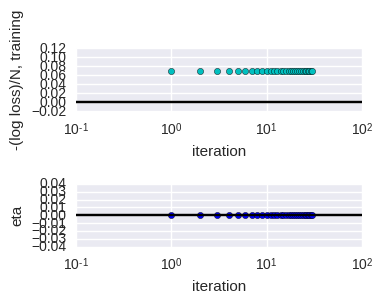

In [53]:
eta0=1e-4
hyper_explorer.train_model(lam=1e5, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 100000.0.  Corresponded to -(log loss)/N, validation = 0.07822460124299482
.....0.0685288037083
.....0.0685224643715
.....0.0685174310381
.....0.0685131325496
.....0.0685093219407
....Loss optimized.  Old/N: 0.0685072116863605, new/N:0.06850653300304363. Eta: 3.3810034413899146e-10


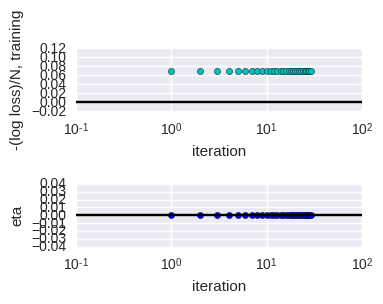

In [54]:
eta0=1e-4
hyper_explorer.train_model(lam=1e5, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


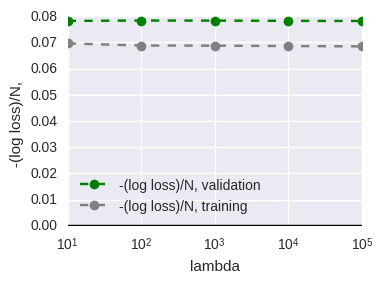

In [55]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 100000.0.  Corresponded to -(log loss)/N, validation = 0.07821143073936977
.....0.0684967598435
.....0.068490561595
.....0.0684856388524
.....0.0684814338419
.....0.0684777053774
...Loss optimized.  Old/N: 0.06847631617333368, new/N:0.06847564032691761. Eta: 3.438802558834294e-10


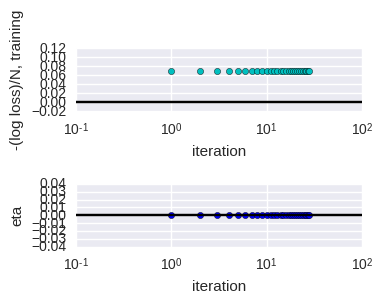

In [56]:
eta0=1e-4
hyper_explorer.train_model(lam=1e6, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 1000000.0.  Corresponded to -(log loss)/N, validation = 0.07819938789277217
.....0.0684660695576
.....0.0684599975494
.....0.0684551739612
.....0.0684510528988
.....0.0684473983068
..Loss optimized.  Old/N: 0.06844671106002595, new/N:0.06844603649481965. Eta: 3.4996710463817337e-10


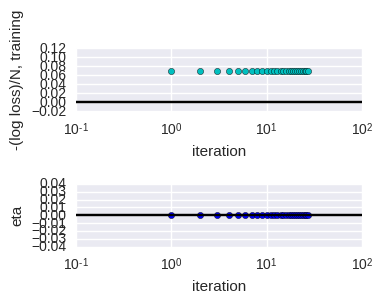

In [57]:
eta0=1e-4
hyper_explorer.train_model(lam=1e6, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 1000000.0.  Corresponded to -(log loss)/N, validation = 0.07818832510965641
.....0.0684366484296
.....0.0684306906876
.....0.0684259570029
.....0.0684219121602
.....0.0684183247179
.Loss optimized.  Old/N: 0.06841832471792278, new/N:0.06841765005299363. Eta: 3.5638905505532455e-10


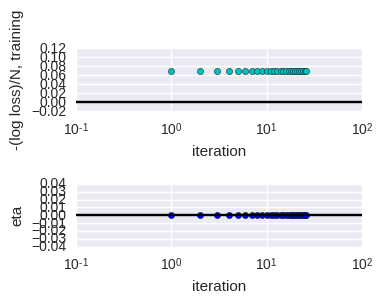

In [58]:
eta0=1e-4
hyper_explorer.train_model(lam=1e6, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 1000000.0.  Corresponded to -(log loss)/N, validation = 0.07817812361756175
.....0.0684084288257
.....0.0684025756654
.....0.0683979243837
.....0.0683939494829
.....0.0683904237199
Loss optimized.  Old/N: 0.06839109973128206, new/N:0.06839042371992572. Eta: 3.6317802803367417e-10


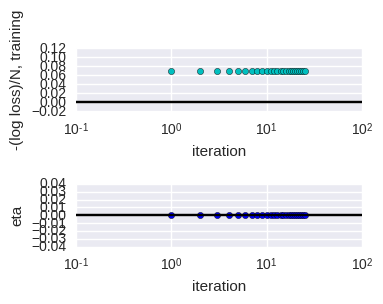

In [59]:
eta0=1e-4
hyper_explorer.train_model(lam=1e7, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 10000000.0.  Corresponded to -(log loss)/N, validation = 0.07816868588693919
.....0.0683813554819
.....0.0683755983998
.....0.0683710229082
.....0.0683671123956
....Loss optimized.  Old/N: 0.0683649871785017, new/N:0.06836430859510782. Eta: 3.703703703703704e-10


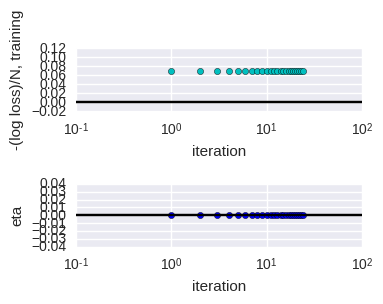

In [60]:
eta0=1e-4
hyper_explorer.train_model(lam=1e7, eta0=eta0, max_iter=10**2, delta_percent=eta0*10, verbose=True)

returning best weights for lambda = 10000000.0.  Corresponded to -(log loss)/N, validation = 0.07815993343927233
.....0.0683553817697
.....0.0683497136365
.....0.0683452083799
.....0.0683413575825
.....0.0683379413825
.....0.0683348408835
.....0.0683319831619
.....0.0683293196685
.....0.0683268161514
.....0.0683244473759
.....0.0683221941143
.....0.068320041317
.....0.0683179769417
.....0.0683159911745
.....0.0683140758916
.....0.0683122242782
.....0.0683104305511
.....0.0683086897522
.....0.0683069975927
.....0.0683053503331
max iterations (100) reached.


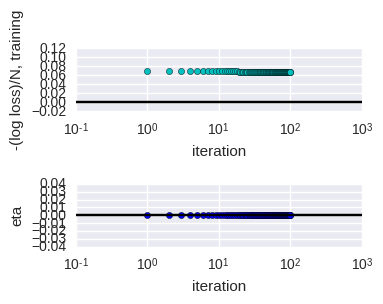

In [61]:
eta0=1e-4
hyper_explorer.train_model(lam=1e7, eta0=eta0, max_iter=10**2, delta_percent=eta0, verbose=True)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


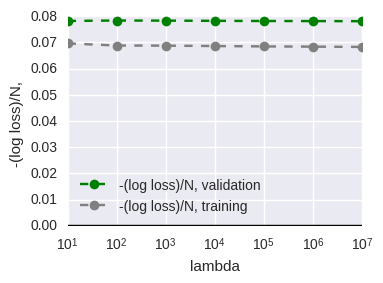

In [62]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 10000000.0.  Corresponded to -(log loss)/N, validation = 0.07814116290495603
.....0.068296738305
.....0.068291263376
.....0.0682869108823
.....0.068283190107
.....0.0682798888393
.....0.0682768923192
.....0.0682741301588
.....0.0682715554967
.....0.0682691352714
.....0.0682668451248
.....0.0682646664972
.....0.0682625848614
.....0.0682605885934
.....0.0682586682194
.....0.0682568158978
.....0.0682550250501
.....0.0682532900935
.....0.0682516062417
.....0.0682499693548
.....0.0682483758228
.....0.0682468224755
.....0.0682453065109
.....0.0682438254381
.....0.0682423770309
.....0.0682409592901
.....0.068239570412
.....0.0682382087634
.....0.068236872859
.....0.0682355613439
.....0.0682342729779
.....0.0682330066224
.....0.068231761229
.....0.06823053583
.....0.0682293295297
.....0.0682281414975
.....0.068226970961
.....0.068225817201
.....0.0682246795458
.....0.0682235573677
.....0.0682224500784
.....0.0682213571262
.....0.0682202779922
.....0.06821921

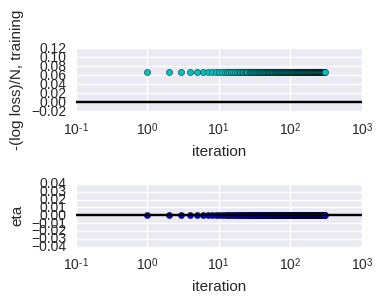

In [63]:
eta0=1e-4
hyper_explorer.train_model(lam=1e8, eta0=eta0, max_iter=3*10**2, delta_percent=eta0, verbose=True)

returning best weights for lambda = 100000000.0.  Corresponded to -(log loss)/N, validation = 0.07811137692953254
.....0.068194657713
.....0.0681894918963
.....0.0681853842043
.....0.0681818720548
.....0.0681787554011
.....0.0681759260596
.....0.0681733176751
.....0.0681708860708
.....0.0681686000784
.....0.0681664367348
.....0.0681643785427
.....0.0681624118065
.....0.0681605255674
.....0.0681587108938
.....0.0681569603926
.....0.0681552678616
.....0.0681536280373
.....0.0681520364073
.....0.0681504890681
.....0.0681489826161
.....0.0681475140623
.....0.068146080765
.....0.0681446803754
.....0.0681433107946
.....0.0681419701375
.....0.0681406567035
.....0.0681393689525
.....0.0681381054842
.....0.0681368650209
.....0.0681356463932
.....0.0681344485275
.....0.0681332704352
.....0.0681321112037
.....0.0681309699887
.....0.0681298460066
.....0.0681287385293
.....0.0681276468784
.....0.0681265704207
.....0.0681255085642
.....0.068124460754
.....0.0681234264699
.....0.0681224052227
.....0.

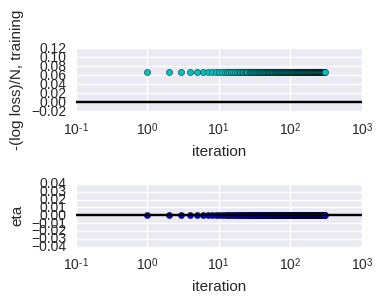

In [64]:
eta0=1e-4
hyper_explorer.train_model(lam=1e8, eta0=eta0, max_iter=3*10**2, delta_percent=eta0, verbose=False)

returning best weights for lambda = 100000000.0.  Corresponded to -(log loss)/N, validation = 0.07808622009788238
............................................................................................................................................................................................................................................................................................................max iterations (300) reached.


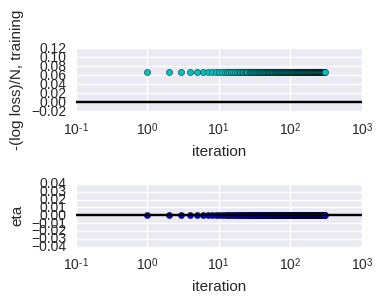

In [65]:
eta0=1e-4
hyper_explorer.train_model(lam=1e8, eta0=eta0, max_iter=3*10**2, delta_percent=eta0, verbose=False)

returning best weights for lambda = 100000000.0.  Corresponded to -(log loss)/N, validation = 0.07806477464122763
............................................................................................................................................................................................................................................................................................................max iterations (300) reached.


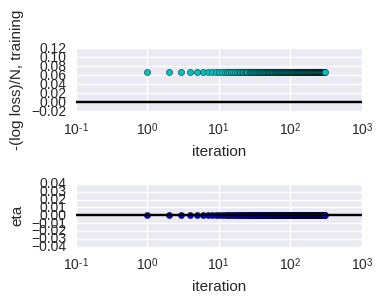

In [66]:
eta0=2e-4
hyper_explorer.train_model(lam=1e8, eta0=eta0, max_iter=3*10**2, delta_percent=eta0, verbose=False)

returning best weights for lambda = 100000000.0.  Corresponded to -(log loss)/N, validation = 0.07803082747957293
............................................................................................................................................................................................................................................................................................................max iterations (300) reached.


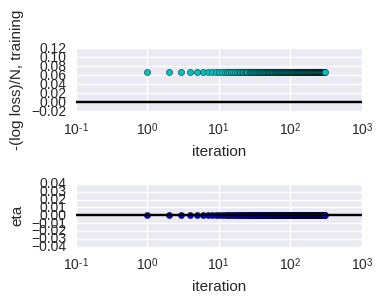

In [67]:
eta0=2e-4
hyper_explorer.train_model(lam=1e8, eta0=eta0, max_iter=3*10**2, delta_percent=eta0, verbose=False)

returning best weights for lambda = 100000000.0.  Corresponded to -(log loss)/N, validation = 0.07800651836679405
......Loss optimized.  Old/N: 0.06767597826203207, new/N:0.06767517467270928. Eta: 1.3998684185526935e-09


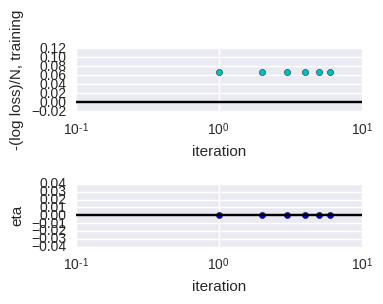

In [68]:
eta0=2e-4
hyper_explorer.train_model(lam=1e8, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*10, verbose=False)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


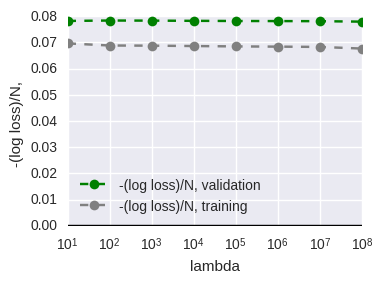

In [69]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.0815273428562595
............................................................................................................................................................................................................................................................................................................max iterations (300) reached.


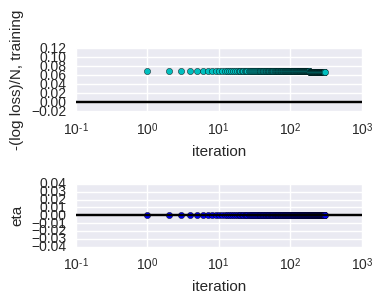

In [73]:
eta0=1e-4
hyper_explorer.train_model(lam=1e9, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*10, verbose=False)

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.07940318861036862
............................................................................................................................................................................................................................................................................................................max iterations (300) reached.


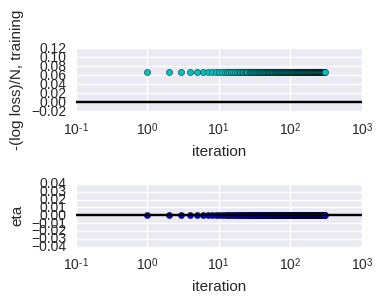

In [74]:
eta0=1e-4
hyper_explorer.train_model(lam=1e9, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.07878530277954121
.................................................................................................................................................................................................................Loss optimized.  Old/N: 0.06742717867219988, new/N:0.06742684217529574. Eta: 1.2778991839673228e-10


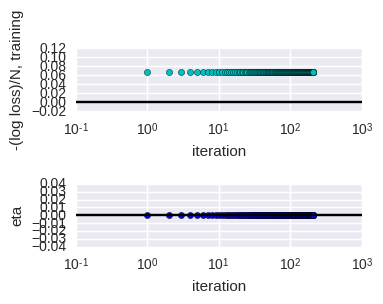

In [75]:
eta0=1e-4
hyper_explorer.train_model(lam=1e9, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.07856518066800058
...............................................................................................................Loss optimized.  Old/N: 0.06734932595350092, new/N:0.06734898929075153. Eta: 1.7498355231908669e-10


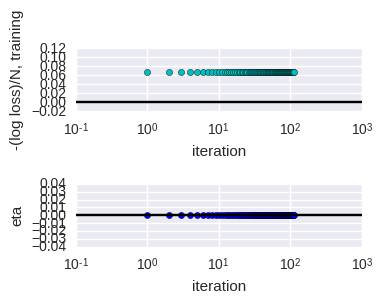

In [76]:
eta0=1e-4
hyper_explorer.train_model(lam=1e9, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.07847134951692886
............................................................................Loss optimized.  Old/N: 0.0673004238411701, new/N:0.06730008840872094. Eta: 2.110381045548851e-10


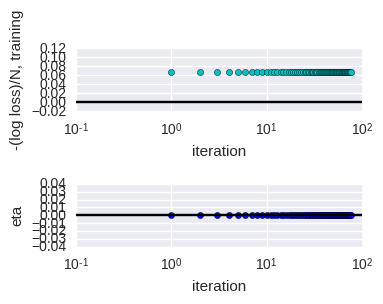

In [77]:
eta0=1e-4
hyper_explorer.train_model(lam=1e9, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.07841582469421485
...........................................................Loss optimized.  Old/N: 0.06726436686098192, new/N:0.06726403289391442. Eta: 2.3907304606218624e-10


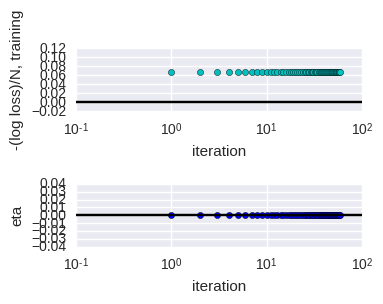

In [78]:
eta0=1e-4
hyper_explorer.train_model(lam=1e9, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


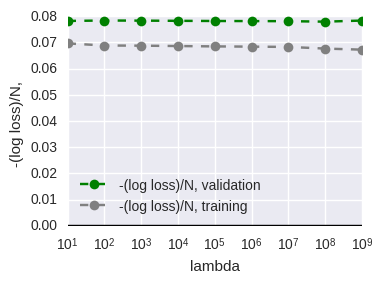

In [79]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 1000000000.0.  Corresponded to -(log loss)/N, validation = 0.07837748272490987
..............................................Loss optimized.  Old/N: 0.06723705026770228, new/N:0.0672367147864651. Eta: 2.701203546257307e-10


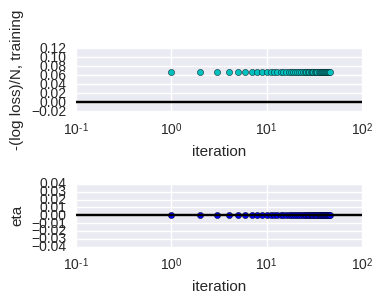

In [80]:
eta0=1e-4
hyper_explorer.train_model(lam=1e10, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 10000000000.0.  Corresponded to -(log loss)/N, validation = 0.07834729010085106
........................................Loss optimized.  Old/N: 0.06721399770696627, new/N:0.06721366469560247. Eta: 2.8921067016408535e-10


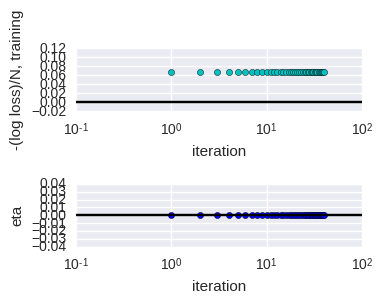

In [81]:
eta0=1e-4
hyper_explorer.train_model(lam=1e10, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 10000000000.0.  Corresponded to -(log loss)/N, validation = 0.07832324308999172
...................................Loss optimized.  Old/N: 0.06719410319823614, new/N:0.06719376821639135. Eta: 3.08641975308642e-10


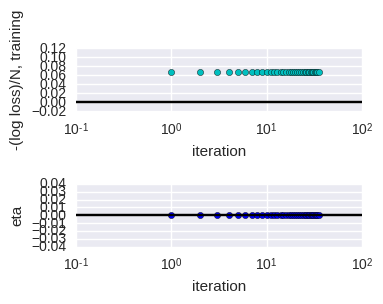

In [82]:
eta0=1e-4
hyper_explorer.train_model(lam=1e10, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


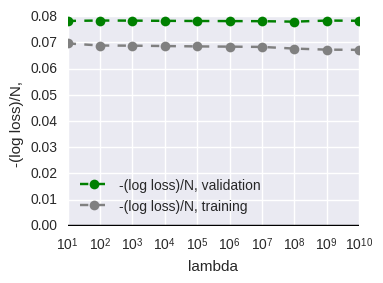

In [83]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 10000000000.0.  Corresponded to -(log loss)/N, validation = 0.07830352397903066
............................................................................................................................................................................................................................................................................................................max iterations (300) reached.


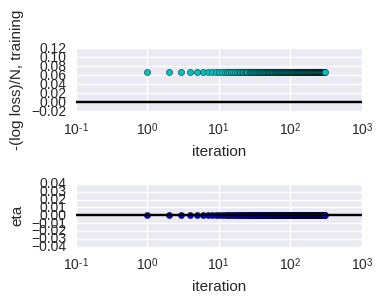

In [84]:
eta0=1e-4
hyper_explorer.train_model(lam=1e10, eta0=eta0, max_iter=3*10**2, delta_percent=eta0, verbose=False)

returning best weights for lambda = 10000000000.0.  Corresponded to -(log loss)/N, validation = 0.07824995568632814
.......Loss optimized.  Old/N: 0.06713094025329445, new/N:0.06713061627407693. Eta: 6.547285010986551e-10


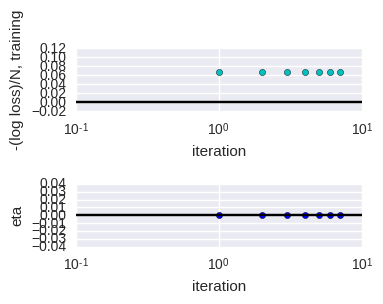

In [85]:
eta0=1e-4
hyper_explorer.train_model(lam=1e11, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 100000000000.0.  Corresponded to -(log loss)/N, validation = 0.07823846057747147
......Loss optimized.  Old/N: 0.06712826335738181, new/N:0.06712793524342431. Eta: 6.999342092763467e-10


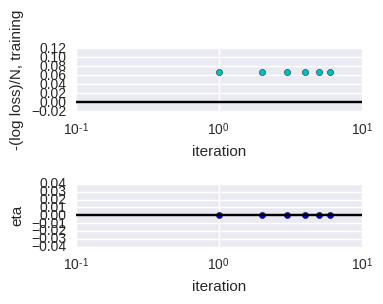

In [86]:
eta0=1e-4
hyper_explorer.train_model(lam=1e11, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


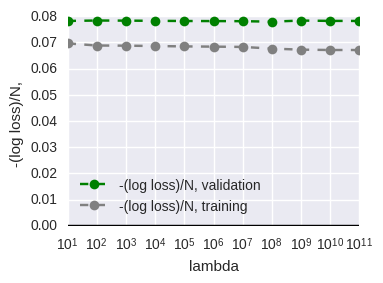

In [87]:
hyper_explorer.plot_best_fits()

returning best weights for lambda = 100000000000.0.  Corresponded to -(log loss)/N, validation = 0.07822902535519212
.Loss optimized.  Old/N: 0.06712793739590155, new/N:0.06712793739590155. Eta: 1.30945700219731e-25


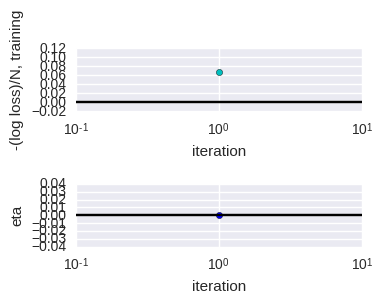

In [96]:
eta0=1e-20
hyper_explorer.train_model(lam=1e12, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

returning best weights for lambda = 1000000000000.0.  Corresponded to -(log loss)/N, validation = 0.07822902482033382
.Loss optimized.  Old/N: 0.06712793739590155, new/N:0.06712793739590155. Eta: 1.3094570021973102e-23


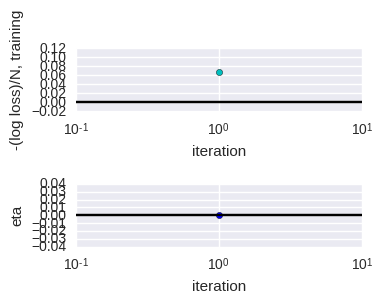

In [97]:
eta0=1e-18
hyper_explorer.train_model(lam=1e12, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

In [99]:
eta0=1e-15
hyper_explorer.train_model(lam=1e12, eta0=eta0, max_iter=3*10**2, delta_percent=eta0*5, verbose=False)

AssertionError: 

../code/hyperparameter_explorer.py:183: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  y2 = self.training_score_name


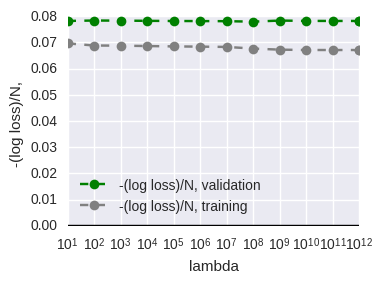

In [104]:
pbf = hyper_explorer.plot_best_fits()

**For hyper explorer's best model**:
* 'lambda': [100000000.0]
* 'lambda normalized': [180.1107372127079]
* '-(log loss)/N, training': [0.069521850509031063]
* 'training (0/1 loss)/N': [0.018574074074074073], 
* 'log loss': [-3754.1799274876776], 
* 'eta0': [0.0002], 
* '# nonzero weights': [267]}

In [107]:
hyper_explorer.train_on_whole_training_set(max_iter=1000)

getting best model.
{'lambda normalized': [180.1107372127079], 'iteration': [6], '-(log loss)/N, training': [0.069521850509031063], 'eta': [1.3998684185526935e-09], 'weights': [array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -5.58148779e-06,  -6.13285630e-06,   6.77553291e-06,
         2.82313871e-07,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.30037105e-07,
        -4.93521904e-07,  -3.17312765e-05,  -8.06400552e-05,
        -2.33837336e-04,  -4.51900233e-04,  -5.46991084e-04,
        -3.60556778e-04,  -6.3

In [101]:
100000000 - 1e8

0.0

In [111]:
final_training_results = hyper_explorer.final_model.results_row()
del final_training_results['weights']
final_training_results

{'# nonzero weights': [252],
 '-(log loss), training': [4111.2767787420507],
 '-(log loss)/N, training': [0.068521279645700844],
 'eta': [2.2075539284417398e-10],
 'eta0': [0.0002],
 'iteration': [233],
 'lambda': [100000000.0],
 'lambda normalized': [180.1107372127079],
 'log loss': [-4111.2767787420507],
 'training (0/1 loss)/N': [0.018616666666666667],
 'training 0/1 loss': [1117]}

In [112]:
hyper_explorer.final_model.plot_test_and_train_01_loss_during_fitting()

TypeError: plot_ys() got an unexpected keyword argument 'label'

Index(['# nonzero weights', '-(log loss), training', '-(log loss)/N, training',
       'eta', 'eta0', 'iteration', 'lambda', 'lambda normalized', 'log loss',
       'log loss percent change', 'training (0/1 loss)/N', 'training 0/1 loss',
       'weights', '-(log loss), testing', '-(log loss)/N, testing',
       'testing (0/1 loss)/N', 'testing 0/1 loss'],
      dtype='object')


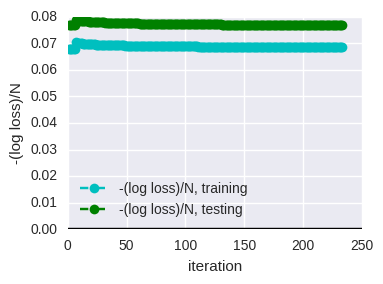

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = hyper_explorer.final_model.results
print(plot_data.columns)
plt.plot(plot_data['iteration'], plot_data['-(log loss)/N, training'], linestyle='--', marker='o', color='c')
plt.plot(plot_data['iteration'], plot_data['-(log loss)/N, testing'], linestyle='--', marker='o', color='g')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('-(log loss)/N')
ax.axhline(y=0, color='k')
plt.tight_layout()
fig.savefig("161031_Q-2-1_norm_log_loss_during_fit.pdf")


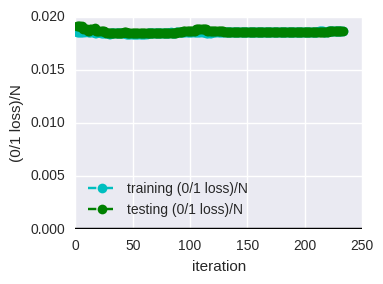

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = hyper_explorer.final_model.results
plt.plot(plot_data['iteration'], plot_data['training (0/1 loss)/N'], linestyle='--', marker='o', color='c')
plt.plot(plot_data['iteration'], plot_data['testing (0/1 loss)/N'], linestyle='--', marker='o', color='g')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('(0/1 loss)/N')
ax.axhline(y=0, color='k')
plt.tight_layout()
fig.savefig("161031_Q-2-1_norm_01_loss_during_fit.pdf")


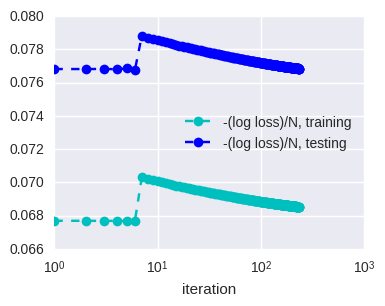

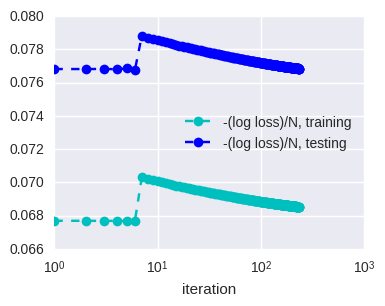

In [124]:
hyper_explorer.final_model.plot_ys(x='iteration', y1='-(log loss)/N, training', y2='-(log loss)/N, testing')

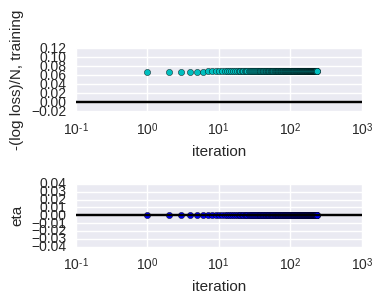

In [125]:
hyper_explorer.final_model.plot_log_loss_normalized_and_eta()

In [126]:
hyper_explorer.evaluate_test_data()

                                                                     0
# nonzero weights                                                  252
-(log loss), test                                               768.45
-(log loss)/N, test                                           0.076845
eta                                                        2.20755e-10
eta0                                                            0.0002
iteration                                                          233
lambda                                                           1e+08
lambda normalized                                              180.111
log loss                                                       -768.45
test (0/1 loss)/N                                               0.0187
test 0/1 loss                                                      187
weights              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...


In [132]:
# For fun, train one model starting at zero.
naive_model = hyper_explorer.final_model.copy()
naive_model.w = naive_model.w.copy()  # just to be safe

In [134]:
# `b.base is a`
naive_model.w.base is hyper_explorer.final_model.w

False

In [137]:
naive_model.w[:]=0

In [138]:
naive_model.w

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [139]:
naive_model.lam

100000000.0

In [143]:
naive_model.max_iter = 1000

In [145]:
naive_model.run()

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Loss optimized.  Old/N: 0.07290634462084887, new/N:0.07290488697638506. Eta: 1.4331119346411592e-10


In [150]:
naive_model.X.shape

(60000, 784)

In [149]:
naive_model.results_row()

{'# nonzero weights': [133],
 '-(log loss), training': [4374.2932185831032],
 '-(log loss)/N, training': [0.072904886976385058],
 'eta': [1.4331119346411592e-10],
 'eta0': [0.0002],
 'iteration': [1773],
 'lambda': [100000000.0],
 'lambda normalized': [180.1107372127079],
 'log loss': [-4374.2932185831032],
 'training (0/1 loss)/N': [0.019883333333333333],
 'training 0/1 loss': [1193],
 'weights': [array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          -1.23384174e-06,  -9.55809295e-07,   1.94282890e-06,
           8.09512040e-08,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00

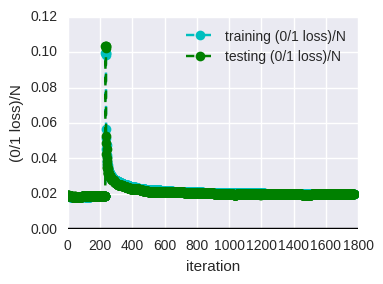

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = naive_model.results
plt.plot(plot_data['iteration'], plot_data['training (0/1 loss)/N'], linestyle='--', marker='o', color='c')
plt.plot(plot_data['iteration'], plot_data['testing (0/1 loss)/N'], linestyle='--', marker='o', color='g')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('(0/1 loss)/N')
ax.axhline(y=0, color='k')
plt.tight_layout()
fig.savefig("161031_Q-2-1_norm_01_loss_during_fit--no_starting_weights.pdf")


Index(['# nonzero weights', '-(log loss), training', '-(log loss)/N, training',
       'eta', 'eta0', 'iteration', 'lambda', 'lambda normalized', 'log loss',
       'log loss percent change', 'training (0/1 loss)/N', 'training 0/1 loss',
       'weights', '-(log loss), testing', '-(log loss)/N, testing',
       'testing (0/1 loss)/N', 'testing 0/1 loss'],
      dtype='object')


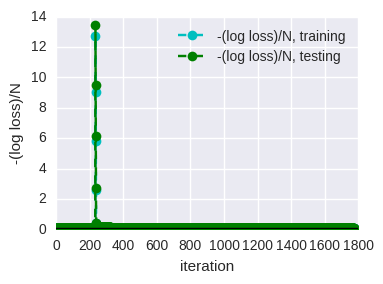

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = naive_model.results
print(plot_data.columns)
plt.plot(plot_data['iteration'], plot_data['-(log loss)/N, training'], linestyle='--', marker='o', color='c')
plt.plot(plot_data['iteration'], plot_data['-(log loss)/N, testing'], linestyle='--', marker='o', color='g')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('-(log loss)/N')
ax.axhline(y=0, color='k')
plt.tight_layout()
fig.savefig("161031_Q-2-1_norm_log_loss_during_fit--no_starting_weights.pdf")
